# Método de Runge-Kutta

### Vitória Yumi Uetuki Nicoleti
RM: 220056

### Exercício

<p style='text-align: justify'> 
Considerando os modelos populacionais:</p>

<p style='text-align: justify'>
1) <b>Malthus:</b></p>
    
<p style='text-align: center'> $$ x' = λx  $$ </p>

<p style='text-align: justify'>
2) <b>Verhulst</b>: </p>
    
<p style='text-align: center'> $$ x' = λx(1 - x) $$ </p>

<p style='text-align: justify'>
3) <b>Gompertz</b>: </p>
    
<p style='text-align: center'> $$ x' = λxln(\frac{1}{x}) $$ </p>

<p style='text-align: justify'> 
Considerando as soluções analíticas:</p>

<p style='text-align: justify'>
1) <b>Malthus:</b></p>
    
<p style='text-align: center'> $$ x(t) = x_{0}*e^{λt}  $$ </p>

<p style='text-align: justify'>
2) <b>Verhulst</b>: </p>
    
<p style='text-align: center'> $$ x(t) = \frac{e^{-λt}}{1 e^{-λt}} $$ </p>

<p style='text-align: justify'>
3) <b>Gompertz</b>: </p>
    
<p style='text-align: center'> $$ x(t) = e^{(ln(x_{0})^{(-λt)})} $$ </p>

### a) Para cada modelo esboce o gráfico das soluções analíticas, juntamente com as soluções numéricas. Nesse problema, considere condição inicial  x(0)=0.5, espaçamento h=1 e constante de crescimento λ=0.1;

In [1]:
# importações
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
# definindo o número de Euler 
e = math.e 

In [3]:
# definindo os modelos, que informam a derivada a ser usada no método
def dx_malthus(λ, x):
    
    derivada = λ * x
    
    return derivada

def dx_verhulst(λ, x):
    
    derivada = λ * x * (1 - x)
    
    return derivada

def dx_gompertz(λ, x):
    
    derivada = λ * x * np.log(1/x)
    
    return derivada

In [4]:
# definindo o método de Euler
def metodo_euler(λ, h, xn, modelo):
    
    if modelo.lower() == "malthus":
    
        xn_1 = xn + h * dx_malthus(λ, xn)
        
    elif modelo.lower() == "verhulst":
        
        xn_1 = xn + h * dx_verhulst(λ, xn)
    
    elif modelo.lower() == "gompertz":
        
        xn_1 = xn + h * dx_gompertz(λ, xn)
    
    return xn_1

In [5]:
# definindo o método de Runge-Kutta
def metodo_runge_kutta(λ, h, xn, modelo):
    
    if modelo.lower() == "malthus":
    
        K1 = dx_malthus(λ, xn)
        K2 = dx_malthus(λ, xn + (h/2)*K1)
        K3 = dx_malthus(λ, xn + (h/2)*K2)
        K4 = dx_malthus(λ, xn + h*K3)
    
    elif modelo.lower() == "verhulst":

        K1 = dx_verhulst(λ, xn)
        K2 = dx_verhulst(λ, xn + (h/2)*K1)
        K3 = dx_verhulst(λ, xn + (h/2)*K2)
        K4 = dx_verhulst(λ, xn + h*K3)
    
    elif modelo.lower() == "gompertz":
    
        K1 = dx_gompertz(λ, xn)
        K2 = dx_gompertz(λ, xn + (h/2)*K1)
        K3 = dx_gompertz(λ, xn + (h/2)*K2)
        K4 = dx_gompertz(λ, xn + h*K3)
    
    xn_1 = xn + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
    
    return xn_1

In [6]:
# definindo a função da solução analítica
def x_malthus(x_0, t):
    
    x_t = x_0 * e ** (λ * t)
    
    return x_t

def x_verhulst(x_0, t):
    
    x_t = (e ** (λ * t))/(1 + (e ** (λ*(t))))
                          
    return x_t

def x_gompertz(x_0, t):
    
    x_t = e ** (np.log(x_0) * e ** (-λ * t))
    
    return x_t

#### Modelo de Malthus

Informações:
 Domínio =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
 Imagem =  [0.5, 0.5525854590378239, 0.6107013790800849, 0.6749294037880016, 0.7459123488206352, 0.8243606353500641, 0.9110594001952546, 1.0068763537352383, 1.1127704642462337, 1.2298015555784747, 1.3591409142295225, 1.5020830119732167, 1.6600584613682738, 1.834648333809622, 2.0275999834223373, 2.2408445351690323, 2.4765162121975575, 2.7369736958636, 3.024823732206473, 3.3429472211396347, 3.6945280494653248, 4.083084956283825, 4.512506749717061, 4.987091227407361, 5.511588190320802, 6.091246980351736, 6.731869017500845, 7.439865862436418, 8.222323385548526, 9.0870726847215

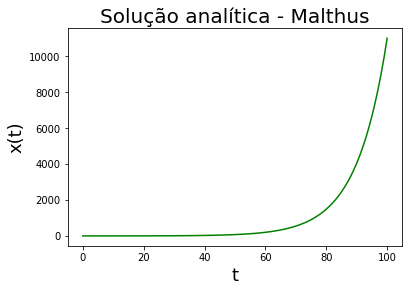

In [7]:
## SOLUÇÃO ANALÍTICA

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

dom_m_sa = list(range(0, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos
im_m_sa = [] # lista imagem calculada pela solução analítica

for n in dom_m_sa: # loop for para a iteração ao longo dos pontos do domínio
    im_m_sa.append(x_malthus(x_0, n)) # calcula x(t) para cada número (n) do domínio e já adiciona na lista da imagem
    
# printando as informações sobre as listas que representam o domínio e a imagem no final de todas as iterações
print("Informações:")
print(" Domínio = ", dom_m_sa)
print(" Imagem = ", im_m_sa)

# ajustando a plotagem
plt.plot(dom_m_sa, im_m_sa, color="green")
plt.title("Solução analítica - Malthus",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Solução analítica - Malthus", dpi = 300)

# plotando
plt.show()

Informações:
 Condição inicial = x(0) =  0.5
 Passo (h) =  1
 λ =  0.1

Domínio =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Imagem =  [0.5, 0.55, 0.6050000000000001, 0.6655000000000001, 0.7320500000000001, 0.805255, 0.8857805000000001, 0.97435855, 1.0717944050000001, 1.1789738455, 1.29687123005, 1.4265583530550001, 1.5692141883605002, 1.7261356071965501, 1.8987491679162052, 2.088624084707826, 2.2974864931786083, 2.527235142496469, 2.77995

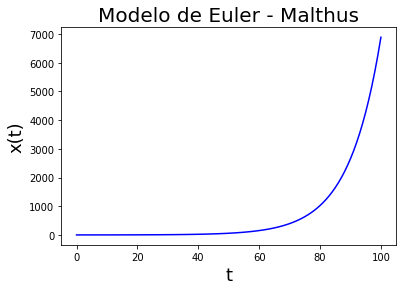

In [8]:
## SOLUÇÃO NUMÉRICA - EULER

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

modelo = "malthus"

# printando informações
print("Informações:")
print(" Condição inicial = x(0) = ", x_0)  
print(" Passo (h) = ", h)  
print(" λ = ", λ)  
print()

dom_m_me = list(np.linspace(0, 100, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos visto que o passo é 1
im_m_me = [0.5] # lista imagem: iniciando já com a condição inicial

for _ in range(1, 101): # loop for para a iteração ao longo dos pontos do domínio, mas já contando com a condição inicial
    
    xn_1 = metodo_euler(λ, h, x_0, modelo) # calcula o x n+1
    im_m_me.append(xn_1) # adiciona na lista imagem
    x_0 = xn_1 # atualiza o valor de xn (no caso, x0) que será utilizado na  próxima iteração

# printando as listas que representam o domínio e a imagem no final de todas as iterações
print("Domínio = ", dom_m_me) 
print()
print("Imagem = ", im_m_me)

# ajustando a plotagem
plt.plot(dom_m_me, im_m_me, color="blue")
plt.title("Modelo de Euler - Malthus",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Modelo de Euler - Malthus", dpi = 300)

# plotando
plt.show()

Informações:
 Condição inicial = x(0) =  0.5
 Passo (h) =  1
 λ =  0.1

Domínio =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Imagem =  [0.5, 0.5525854166666667, 0.6107012854253473, 0.6749292485312689, 0.7459121200403429, 0.8243603192984191, 0.9110589810459666, 1.0068758132983884, 1.1127697816461577, 1.2298007068900354, 1.359139872067583, 1.5020817450294905, 1.6600569338890296, 1.8346465050069172, 2.027597806810582, 2.2408419578176897, 2.47

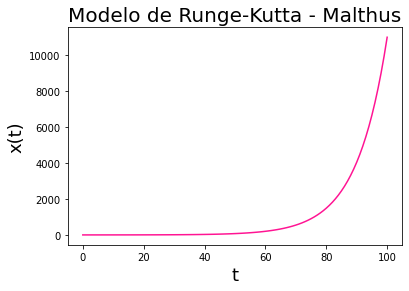

In [9]:
## SOLUÇÃO NUMÉRICA - RUNGE-KUTTA

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

modelo = "malthus"

# printando informações
print("Informações:")
print(" Condição inicial = x(0) = ", x_0)  
print(" Passo (h) = ", h)  
print(" λ = ", λ)  
print()

dom_m_mrk = list(np.linspace(0, 100, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos visto que o passo é 1
im_m_mrk = [0.5] # lista imagem: iniciando já com a condição inicial

for _ in range(1, 101): # loop for para a iteração ao longo dos pontos do domínio, mas já contando com a condição inicial
    
    xn_1 = metodo_runge_kutta(λ, h, x_0, modelo) # calcula o x n+1
    im_m_mrk.append(xn_1) # adiciona na lista imagem
    x_0 = xn_1 # atualiza o valor de xn (no caso, x0) que será utilizado na  próxima iteração

# printando as listas que representam o domínio e a imagem no final de todas as iterações
print("Domínio = ", dom_m_mrk) 
print()
print("Imagem = ", im_m_mrk)

# ajustando a plotagem
plt.plot(dom_m_mrk, im_m_mrk, color="deeppink")
plt.title("Modelo de Runge-Kutta - Malthus",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Modelo de Runge-Kutta - Malthus", dpi = 300)

# plotando
plt.show()

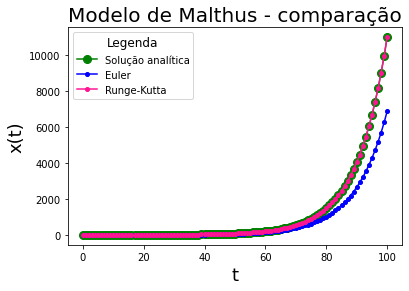

In [10]:
## PLOTANDO TODOS JUNTOS A FIM DE COMPARAÇÃO

# ajustando a plotagem
plt.plot(dom_m_sa, im_m_sa, color="green", marker="o", markersize=8) 
plt.plot(dom_m_me, im_m_me, color="blue", marker="o", markersize=4)
plt.plot(dom_m_mrk, im_m_mrk, color="deeppink", marker="o", markersize=4)
plt.title("Modelo de Malthus - comparação",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)
legend = plt.legend(['Solução analítica','Euler', 'Runge-Kutta'], title = "Legenda", title_fontsize = 12)

# salvando a figura
plt.savefig("Modelo de Malthus - comparação", dpi = 300)

# plotando
plt.show()

#### Modelo de Verhulst

Informações:
 Domínio =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
 Imagem =  [0.5, 0.52497918747894, 0.549833997312478, 0.574442516811659, 0.598687660112452, 0.6224593312018546, 0.6456563062257955, 0.6681877721681662, 0.6899744811276124, 0.7109495026250039, 0.7310585786300049, 0.7502601055951176, 0.7685247834990178, 0.7858349830425585, 0.8021838885585817, 0.8175744761936437, 0.8320183851339245, 0.8455347349164652, 0.8581489350995122, 0.8698915256370021, 0.8807970779778825, 0.8909031788043871, 0.9002495108803149, 0.9088770389851438, 0.9168273035060777, 0.9241418199787564, 0.9308615796566532, 0.9370266439430035, 0.9426758241011313, 0.94784

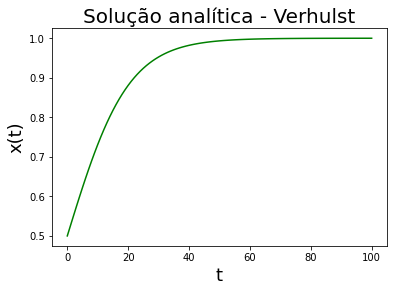

In [11]:
## SOLUÇÃO ANALÍTICA

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

dom_v_sa = list(range(0, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos
im_v_sa = [] # lista imagem calculada pela solução analítica

for n in dom_v_sa: # loop for para a iteração ao longo dos pontos do domínio
    im_v_sa.append(x_verhulst(x_0, n)) # calcula x(t) para cada número (n) do domínio e já adiciona na lista da imagem
    
# printando as informações sobre as listas que representam o domínio e a imagem no final de todas as iterações
print("Informações:")
print(" Domínio = ", dom_v_sa)
print(" Imagem = ", im_v_sa)

# ajustando a plotagem
plt.plot(dom_v_sa, im_v_sa, color="green")
plt.title("Solução analítica - Verhulst",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Solução analítica - Verhulst", dpi = 300)

# plotando
plt.show()

Informações:
 Condição inicial = x(0) =  0.5
 Passo (h) =  1
 λ =  0.1

Domínio =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Imagem =  [0.5, 0.525, 0.5499375, 0.574688124609375, 0.5991302930136084, 0.6231476115143121, 0.646631078092144, 0.6694810107858976, 0.6916086294841967, 0.7129372427949154, 0.7334030158580054, 0.7529553190768441, 0.7715566797319173, 0.789182376701215, 0.8058197320017587, 0.821467161153596, 0.8361330475835808, 0.849834

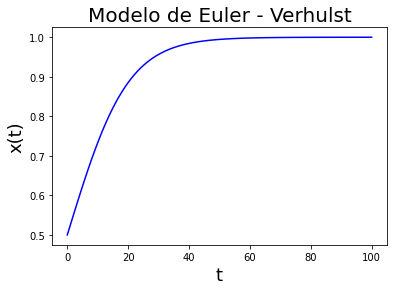

In [12]:

## SOLUÇÃO NUMÉRICA - EULER

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

modelo = "verhulst"

# printando informações
print("Informações:")
print(" Condição inicial = x(0) = ", x_0)  
print(" Passo (h) = ", h)  
print(" λ = ", λ)  
print()

dom_v_me = list(np.linspace(0, 100, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos visto que o passo é 1
im_v_me = [0.5] # lista imagem: iniciando já com a condição inicial

for _ in range(1, 101): # loop for para a iteração ao longo dos pontos do domínio, mas já contando com a condição inicial
    
    xn_1 = metodo_euler(λ, h, x_0, modelo) # calcula o x n+1
    im_v_me.append(xn_1) # adiciona na lista imagem
    x_0 = xn_1 # atualiza o valor de xn (no caso, x0) que será utilizado na  próxima iteração

# printando as listas que representam o domínio e a imagem no final de todas as iterações
print("Domínio = ", dom_v_me) 
print()
print("Imagem = ", im_v_me)

# ajustando a plotagem
plt.plot(dom_v_me, im_v_me, color="blue")
plt.title("Modelo de Euler - Verhulst",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Modelo de Euler - Verhulst", dpi = 300)

# plotando
plt.show()

Informações:
 Condição inicial = x(0) =  0.5
 Passo (h) =  1
 λ =  0.1

Domínio =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Imagem =  [0.5, 0.5249791861755524, 0.5498339946708539, 0.574442512752473, 0.5986876545159727, 0.6224593239147748, 0.6456562970704296, 0.6681877609534379, 0.6899744676611106, 0.7109494867252997, 0.7310585601384104, 0.7502600843861292, 0.7685247594888148, 0.7858349561951136, 0.8021838588891407, 0.8175744437695538, 0.8

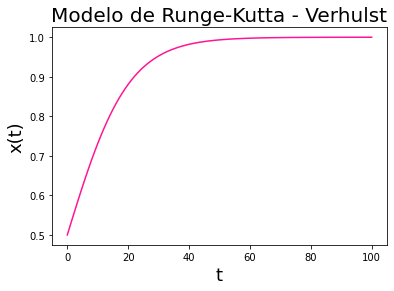

In [13]:

## SOLUÇÃO NUMÉRICA - RUNGE-KUTTA

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

modelo = "verhulst"

# printando informações
print("Informações:")
print(" Condição inicial = x(0) = ", x_0)  
print(" Passo (h) = ", h)  
print(" λ = ", λ)  
print()

dom_v_mrk = list(np.linspace(0, 100, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos visto que o passo é 1
im_v_mrk = [0.5] # lista imagem: iniciando já com a condição inicial

for _ in range(1, 101): # loop for para a iteração ao longo dos pontos do domínio, mas já contando com a condição inicial
    
    xn_1 = metodo_runge_kutta(λ, h, x_0, modelo) # calcula o x n+1
    im_v_mrk.append(xn_1) # adiciona na lista imagem
    x_0 = xn_1 # atualiza o valor de xn (no caso, x0) que será utilizado na  próxima iteração

# printando as listas que representam o domínio e a imagem no final de todas as iterações
print("Domínio = ", dom_v_mrk) 
print()
print("Imagem = ", im_v_mrk)

# ajustando a plotagem
plt.plot(dom_v_mrk, im_v_mrk, color="deeppink")
plt.title("Modelo de Runge-Kutta - Verhulst",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Modelo de Runge-Kutta - Verhulst", dpi = 300)

# plotando
plt.show()

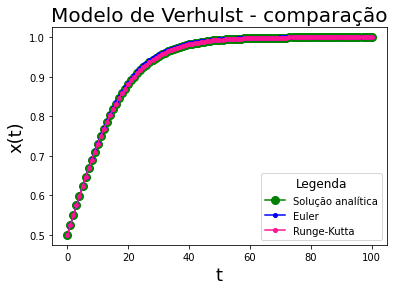

In [14]:
## PLOTANDO TODOS JUNTOS A FIM DE COMPARAÇÃO

# ajustando a plotagem
plt.plot(dom_v_sa, im_v_sa, color="green", marker="o", markersize=8) 
plt.plot(dom_v_me, im_v_me, color="blue", marker="o", markersize=4)
plt.plot(dom_v_mrk, im_v_mrk, color="deeppink", marker="o", markersize=4)
plt.title("Modelo de Verhulst - comparação",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)
legend = plt.legend(['Solução analítica','Euler', 'Runge-Kutta'], title = "Legenda", title_fontsize = 12)

# salvando a figura
plt.savefig("Modelo de Verhulst - comparação", dpi = 300)

# plotando
plt.show()

#### Método de Gompertz

Informações:
 Domínio =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
 Imagem =  [0.5, 0.5340928892854316, 0.5669405033441959, 0.5983998751431957, 0.6283672754254238, 0.6567741909868685, 0.6835829714104538, 0.7087824052937595, 0.7323834197942259, 0.754415038595224, 0.7749206845099507, 0.7939548739587076, 0.8115803207586513, 0.8278654449061112, 0.8428822669932962, 0.8567046592676001, 0.8694069188992866, 0.8810626267136116, 0.8917437545817682, 0.9015199861378947, 0.9104582179395536, 0.9186222111947872, 0.926072367431122, 0.9328656047627296, 0.9390553145745854, 0.9446913813944326, 0.9498202514124512, 0.9544850375114745, 0.9587256507842833, 0.96

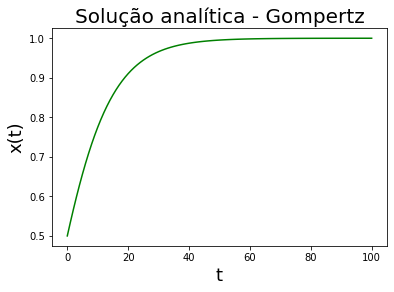

In [15]:
## SOLUÇÃO ANALÍTICA

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

dom_g_sa = list(range(0, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos
im_g_sa = [] # lista imagem calculada pela solução analítica

for n in dom_g_sa: # loop for para a iteração ao longo dos pontos do domínio
    im_g_sa.append(x_gompertz(x_0, n)) # calcula x(t) para cada número (n) do domínio e já adiciona na lista da imagem
    
# printando as informações sobre as listas que representam o domínio e a imagem no final de todas as iterações
print("Informações:")
print(" Domínio = ", dom_g_sa)
print(" Imagem = ", im_g_sa)

# ajustando a plotagem
plt.plot(dom_g_sa, im_g_sa, color="green")
plt.title("Solução analítica - Gompertz",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Solução analítica - Gompertz", dpi = 300)

# plotando
plt.show()

Informações:
 Condição inicial = x(0) =  0.5
 Passo (h) =  1
 λ =  0.1

Domínio =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Imagem =  [0.5, 0.5346573590279973, 0.5681338168173737, 0.6002560059545669, 0.6308930147644017, 0.6599531444294423, 0.6873799022003223, 0.7131475855944623, 0.7372567440584044, 0.7597297365790346, 0.7806065413644039, 0.799940919885696, 0.8177969934494523, 0.8342462560135565, 0.8493650213727075, 0.8632322849146423, 0.8

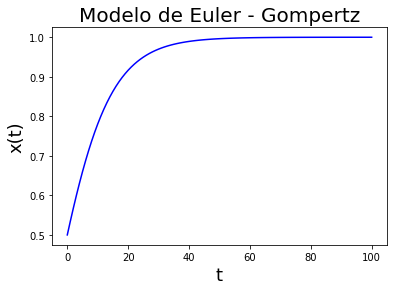

In [16]:
## SOLUÇÃO NUMÉRICA - EULER

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

modelo = "gompertz"

# printando informações
print("Informações:")
print(" Condição inicial = x(0) = ", x_0)  
print(" Passo (h) = ", h)  
print(" λ = ", λ)  
print()

dom_g_me = list(np.linspace(0, 100, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos visto que o passo é 1
im_g_me = [0.5] # lista imagem: iniciando já com a condição inicial

for _ in range(1, 101): # loop for para a iteração ao longo dos pontos do domínio, mas já contando com a condição inicial
    
    xn_1 = metodo_euler(λ, h, x_0, modelo) # calcula o x n+1
    im_g_me.append(xn_1) # adiciona na lista imagem
    x_0 = xn_1 # atualiza o valor de xn (no caso, x0) que será utilizado na  próxima iteração

# printando as listas que representam o domínio e a imagem no final de todas as iterações
print("Domínio = ", dom_g_me) 
print()
print("Imagem = ", im_g_me)

# ajustando a plotagem
plt.plot(dom_g_me, im_g_me, color="blue")
plt.title("Modelo de Euler - Gompertz",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Modelo de Euler - Gompertz", dpi = 300)

# plotando
plt.show()

Informações:
 Condição inicial = x(0) =  0.5
 Passo (h) =  1
 λ =  0.1

Domínio =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Imagem =  [0.5, 0.534092881828875, 0.5669404884639792, 0.5983998528855354, 0.628367245894879, 0.6567741543711485, 0.6835829279906804, 0.7087823554442584, 0.7323833639749322, 0.754414977339146, 0.7749206184076709, 0.793954803641524, 0.8115802468816256, 0.8278653681319785, 0.8428821879779127, 0.8567045786473542, 0.8694

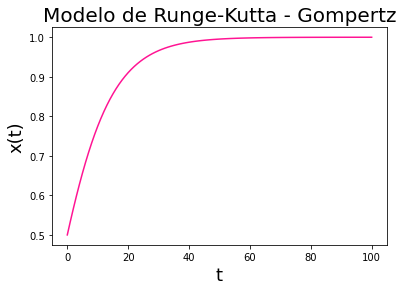

In [17]:
## SOLUÇÃO NUMÉRICA - RUNGE-KUTTA

# CONDIÇÕES INICIAIS
x_0 = 0.5
h = 1
λ = 0.1

modelo = "gompertz"

# printando informações
print("Informações:")
print(" Condição inicial = x(0) = ", x_0)  
print(" Passo (h) = ", h)  
print(" λ = ", λ)  
print()

dom_g_mrk = list(np.linspace(0, 100, 101)) # lista domínio: indo de 0 a 10, tendo 11 pontos visto que o passo é 1
im_g_mrk = [0.5] # lista imagem: iniciando já com a condição inicial

for _ in range(1, 101): # loop for para a iteração ao longo dos pontos do domínio, mas já contando com a condição inicial
    
    xn_1 = metodo_runge_kutta(λ, h, x_0, modelo) # calcula o x n+1
    im_g_mrk.append(xn_1) # adiciona na lista imagem
    x_0 = xn_1 # atualiza o valor de xn (no caso, x0) que será utilizado na  próxima iteração

# printando as listas que representam o domínio e a imagem no final de todas as iterações
print("Domínio = ", dom_g_mrk) 
print()
print("Imagem = ", im_g_mrk)

# ajustando a plotagem
plt.plot(dom_g_mrk, im_g_mrk, color="deeppink")
plt.title("Modelo de Runge-Kutta - Gompertz",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)

# salvando a figura
plt.savefig("Modelo de Runge-Kutta - Gompertz", dpi = 300)

# plotando
plt.show()

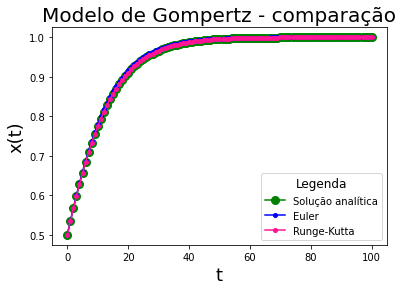

In [18]:
## PLOTANDO TODOS JUNTOS A FIM DE COMPARAÇÃO

# ajustando a plotagem
plt.plot(dom_g_sa, im_g_sa, color="green", marker="o", markersize=8) 
plt.plot(dom_g_me, im_g_me, color="blue", marker="o", markersize=4)
plt.plot(dom_g_mrk, im_g_mrk, color="deeppink", marker="o", markersize=4)
plt.title("Modelo de Gompertz - comparação",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)
legend = plt.legend(['Solução analítica','Euler', 'Runge-Kutta'], title = "Legenda", title_fontsize = 12)

# salvando a figura
plt.savefig("Modelo de Gompertz - comparação", dpi = 300)

# plotando
plt.show()

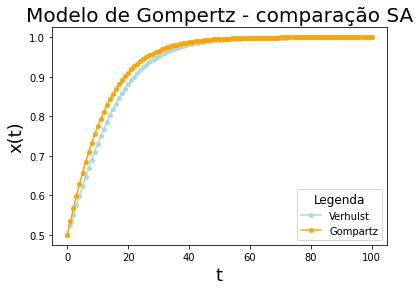

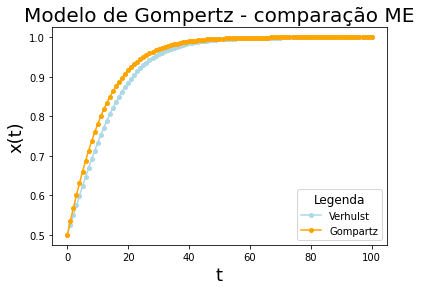

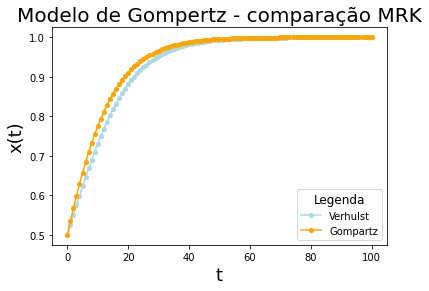

In [19]:
## COMPARANDO VERHULST E GOMPERTZ

# Solução analítica
# ajustando a plotagem 
plt.plot(dom_v_sa, im_v_sa, color="lightblue", marker="o", markersize=4)
plt.plot(dom_g_sa, im_g_sa, color="orange", marker="o", markersize=4)
plt.title("Modelo de Gompertz - comparação SA",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)
legend = plt.legend(['Verhulst','Gompartz'], title = "Legenda", title_fontsize = 12)

# salvando a figura
plt.savefig("Verhulst e Gompartz - comparação SA", dpi = 300)

# plotando
plt.show()

# Método de Euler
# ajustando a plotagem 
plt.plot(dom_v_me, im_v_me, color="lightblue", marker="o", markersize=4)
plt.plot(dom_g_me, im_g_me, color="orange", marker="o", markersize=4)
plt.title("Modelo de Gompertz - comparação ME",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)
legend = plt.legend(['Verhulst','Gompartz'], title = "Legenda", title_fontsize = 12)

# salvando a figura
plt.savefig("Verhulst e Gompartz - comparação ME", dpi = 300)

# plotando
plt.show()

# Método de Runge-Kutta
# ajustando a plotagem 
plt.plot(dom_v_mrk, im_v_mrk, color="lightblue", marker="o", markersize=4)
plt.plot(dom_g_mrk, im_g_mrk, color="orange", marker="o", markersize=4)
plt.title("Modelo de Gompertz - comparação MRK",fontsize=20)
plt.xlabel("t",fontsize=18)
plt.ylabel("x(t)",fontsize=18)
legend = plt.legend(['Verhulst','Gompartz'], title = "Legenda", title_fontsize = 12)

# salvando a figura
plt.savefig("Verhulst e Gompartz - comparação MRK", dpi = 300)

# plotando
plt.show()